DOWNLOADING OUR S&P 500 PRICE DATA

In [35]:
import yfinance as yf
import matplotlib.pyplot as plt

In [36]:
sp500 = yf.Ticker("^GSPC")

In [37]:
sp500 = sp500.history(period="max")

In [38]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2025-04-09 00:00:00-04:00,4965.279785,5481.339844,4948.430176,5456.899902,9489600000,0.0,0.0
2025-04-10 00:00:00-04:00,5353.149902,5353.149902,5115.270020,5268.049805,6677140000,0.0,0.0
2025-04-11 00:00:00-04:00,5255.560059,5381.459961,5220.770020,5363.359863,5602550000,0.0,0.0


In [39]:
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2025-04-02 00:00:00-04:00', '2025-04-03 00:00:00-04:00',
               '2025-04-04 00:00:00-04:00', '2025-04-07 00:00:00-04:00',
               '2025-04-08 00:00:00-04:00', '2025-04-09 00:00:00-04:00',
               '2025-04-10 00:00:00-04:00', '2025-04-11 00:00:00-04:00',
               '2025-04-14 00:00:00-04:00', '2025-04-15 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24438, freq=None)

CLEANING AND VISUALISING OUR STOCK MARKET DATA

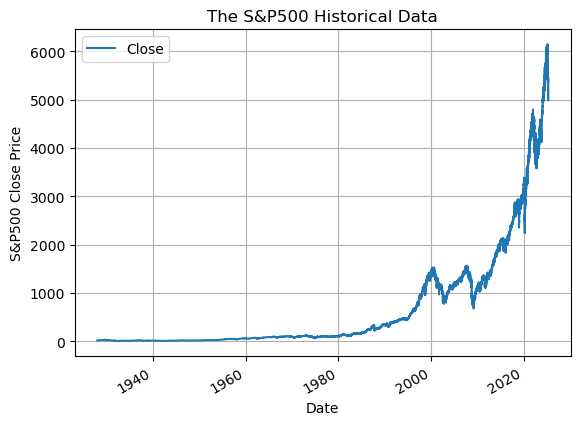

In [40]:
sp500.plot.line(y="Close", use_index=True)
plt.title("The S&P500 Historical Data")
plt.xlabel("Date")
plt.ylabel("S&P500 Close Price")
plt.grid(True)
plt.show()

In [41]:
del sp500["Dividends"]
del sp500["Stock Splits"]

SETTING UP THE TARGET VARIABLE FOR MACHINE LEARNING

In [42]:
sp500["Tomorrow"] = sp500["Close"].shift(-1)

In [43]:
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2025-04-09 00:00:00-04:00,4965.279785,5481.339844,4948.430176,5456.899902,9489600000,5268.049805
2025-04-10 00:00:00-04:00,5353.149902,5353.149902,5115.270020,5268.049805,6677140000,5363.359863
2025-04-11 00:00:00-04:00,5255.560059,5381.459961,5220.770020,5363.359863,5602550000,5405.970215


In [58]:
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)

In [59]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2025-04-09 00:00:00-04:00,4965.279785,5481.339844,4948.430176,5456.899902,9489600000,5268.049805,0
2025-04-10 00:00:00-04:00,5353.149902,5353.149902,5115.270020,5268.049805,6677140000,5363.359863,1
2025-04-11 00:00:00-04:00,5255.560059,5381.459961,5220.770020,5363.359863,5602550000,5405.970215,1
